In [1]:
import os
import glob
import itertools
import numpy as np
from skimage.transform import resize
from skimage.util import img_as_ubyte
from skimage import io

In [2]:
SUPPORTED_EXTENSIONS = ["bmp", "png", "jpg", "jpeg"]

In [3]:
def dataset_files(root):
    """Returns a list of all image files in the given directory"""
    return list(itertools.chain.from_iterable(
        glob.glob(os.path.join(root, "*.{}".format(ext))) for ext in SUPPORTED_EXTENSIONS))

In [6]:
# get image name list
imlist = dataset_files("data\imgs")
N = len(imlist)
print('number of images:{}'.format(N))

number of images:14


In [8]:
# Assume all images are the same size, get dimensions of first image
img_shape = io.imread(imlist[0]).shape
print('dimensions of first image:{}'.format(img_shape))

dimensions of first image:(218, 178, 3)


In [12]:
# Create a numpy array of floats to store the average (assume RGB images)
avg_img = np.zeros(img_shape, dtype=np.float)
avg_img=resize(avg_img, (120, 100, 3), mode='reflect')
print('dimensions of empty array:{}'.format(avg_img.shape))

dimensions of empty array:(120, 100, 3)


In [14]:
# compute the average image
for im in imlist:
    img = io.imread(im)
    img=resize(img, (120, 100, 3), mode='reflect')
    avg_img += img / N

print(avg_img[0][1][:])

[1.08954393 1.02268679 0.90643529]


In [15]:
# Round values in array and cast as 8-bit integer
avg_img = avg_img.flatten()
avg_img = (avg_img - avg_img.min(axis=0)) / (avg_img.max(axis=0) - avg_img.min(axis=0))
avg_img = avg_img.reshape((120, 100, 3))
avg_img = img_as_ubyte(avg_img)

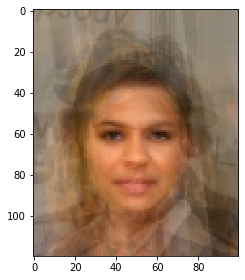

In [16]:
# show the average image and save it
io.imshow(avg_img)
#io.imsave("average.jpg", avg_img)
io.show()

In [ ]:
#test